<a href="https://colab.research.google.com/github/vickydaiya/Widhya-Internship/blob/main/Covid19_cases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Downloading the data**

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv"
data = pd.read_csv(url)
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


### **Checking for NA values**

In [2]:
for cols in data.columns:
  print(cols,": ",data[cols].isna().sum())

Sno :  0
Date :  0
State/UnionTerritory :  0
ConfirmedIndianNational :  0
ConfirmedForeignNational :  0
Cured :  0
Deaths :  0


### **Grouping data by date**

In [3]:
data_by_dates = data.groupby(by = "Date",sort = False)

### **Total number of cases (ConfirmedIndianNational +	ConfirmedForeignNational + Cured + Deaths)**

In [4]:
total_cases = data_by_dates.sum().drop('Sno',axis=1).sum(axis=1)

### **Plotting total cases vs date**

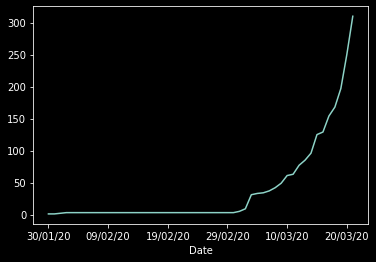

In [5]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
total_cases.plot()

### **Computing value of r**

As we saw above, the plot number of cases vs time looks like an exponential curve. Hence, we will fit an exponential model which predict's the number of cases P_t on a day as P_t = P_o * (e^r*t). P_o is the number of cases on a particular day and t is number of days between the day for which P_t is to be calculated and the day for which we considered P_o 

Example: if we want to predict cases for 15-03-20 using number of cases from 05-03-20. Then, P_t is cases on 15th, P_o is cases on 5th and t is 10 (15-5)

r is the rate of increase in number of cases in a day. We have 18 (we are considering a subset of this data) such values (r from 04-03-20 to 20-03-20). We will take the average of this value as r for our model.

In [6]:
total_cases_subset = total_cases['04/03/20':'21/03/20']

r_sum = 0.0

for i in range(len(total_cases_subset)-1):
  r_sum = r_sum + (total_cases_subset[i+1] - total_cases_subset[i])/total_cases_subset[i]

r_avg = r_sum/(len(total_cases_subset) - 1)
print('Value of r for our model: ',r_avg)

Value of r for our model:  0.14814803793984233


### **predicted total cases after 26 days from 04-03-20 (predicted total cases on 30-03-20)**

In [7]:
import math

print('Predicted number of cases: ',round(total_cases_subset['04/03/20'] * math.exp(r_avg * 26)))

Predicted number of cases:  1459
